#EECS 442 PS1: Filtering

__Please provide the following information__
(e.g. Andrew Owens, ahowens):

[Your first name] [Your last name], [Your UMich uniqname]

__Important__:
1. after you download the .ipynb file, please name it as __your_uniquename_your_umid.ipynb__ before you submit it to canvas. Example: adam_01101100.ipynb.
2. Please convert the your Colab notebook to a PDF file and submit the PDF file to Gradescope. You can follow [this](https://docs.google.com/document/d/1U49zxpV736_BIUh_mfCn66D20UYAGsKQbfJPvwuiX1s/edit?usp=sharing) instructions. For your convenience, we have included the PDF conversion script at the end of this notebook.  




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent. You can also host your notebook locally.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).



# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [118]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import urllib.request
import math

# Download the images that you'll need
#base_url = 'https://web.eecs.umich.edu/~ahowens/eecs442/fa23/psets/ps1/ims'
base_url = 'https://andrewowens.com/eecs442-fa23-mirror/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

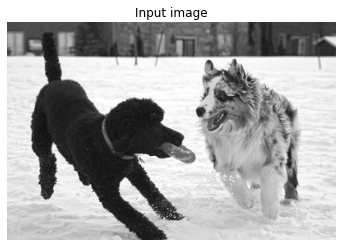

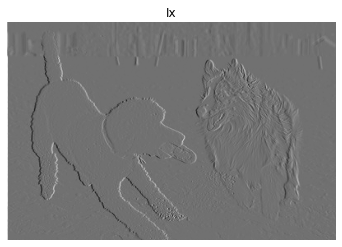

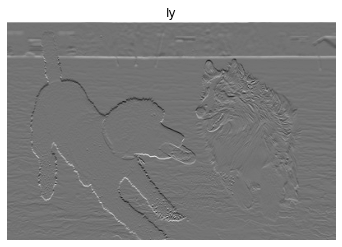

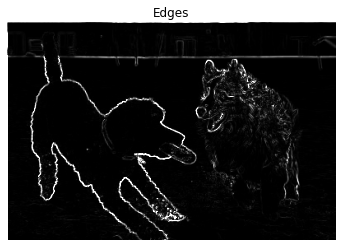

In [119]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255. 


# Your code here!
######################### Solution code #########################

dx = np.array([[1,-1]])
dy = np.array([[1],[-1]])

def cellOf(im, h, m, n):
    sum = 0
    for i in range(h.shape[1]):
        for k in range(h.shape[0]):
            sum += (h[k][i] * im[m - k][n - i]) if (m - k >= 0 and n - i >= 0)  else 0
    return sum

# convolve 2d image im with 2d filter h
def convolve(im, h):
    ans = np.zeros(im.shape)
    for y in range(im.shape[1]):
        for x in range(im.shape[0]):
            ans[x][y] = cellOf(im, h, x, y)
           
    return ans
            
   



######################### End solution code #########################

# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix, cmap = 'gray')

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy, cmap = 'gray')

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
# The `vmin' and `vmax' parameters are set so that 0 is always set to be
# the lowest value and the highest value is set on a per-input basis
# to the 99th percentile value in `edges'.
plt.imshow(edges, cmap = 'gray', vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

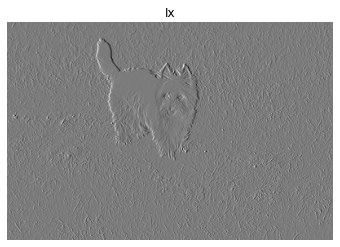

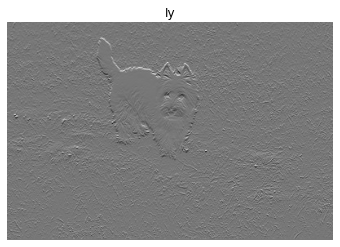

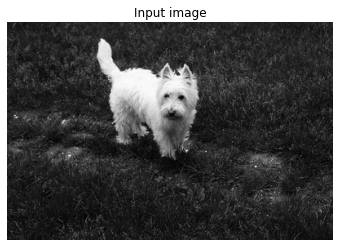

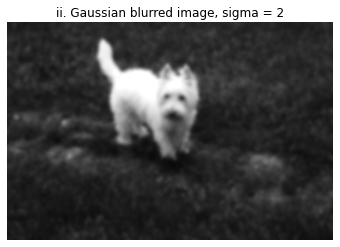

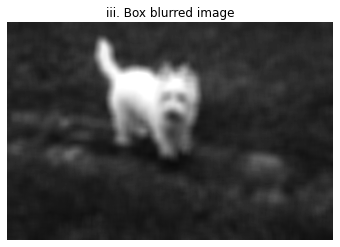

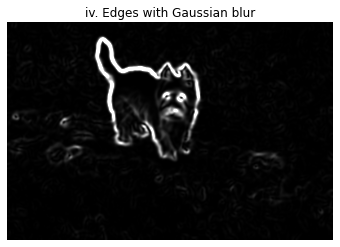

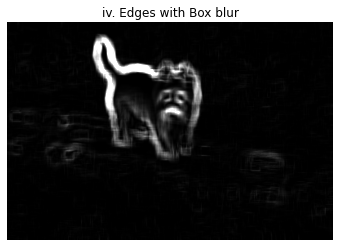

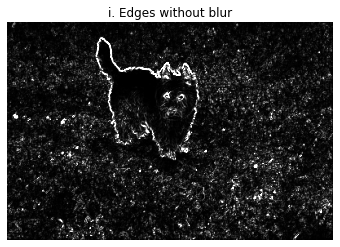

In [120]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

# Your code here!
######################### Solution code #########################


# i: unblurred

Ix = scipy.ndimage.convolve(im, dx)
Iy = scipy.ndimage.convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix, cmap = 'gray' )

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy, cmap = 'gray' )

plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

#plt.figure()
#plt.title('i. Edges without blur')
#plt.axis('off')
# Please visualize edge responses using this range of values.
# The `vmin' and `vmax' parameters are set so that 0 is always set to be
# the lowest value and the highest value is set on a per-input basis
# to the 99th percentile value in `edges'.
#plt.imshow(edges, cmap = 'gray', vmin = 0., vmax = np.percentile(edges, 99))



# ii: Gaussian blurred

# 11x11 gaussian with st dev = 2
sigma = 2
G = np.zeros((11,11))
for row in range(11):
    for col in range(11):
        G[row][col] = (1/(2 * np.pi * sigma**2)) * np.e ** -(((row - (11/2))**2 + (col - (11/2))**2) / (2 * sigma**2))

# normalize
G = G / np.sum(G)

# convolve with gaussian
im_gaussian_blurred = scipy.ndimage.convolve(im, G)

plt.figure()
plt.title('ii. Gaussian blurred image, sigma = 2')
plt.axis('off')
plt.imshow(im_gaussian_blurred, cmap = 'gray', vmin = 0, vmax = np.percentile(im_gaussian_blurred, 99))


#box filter
box = np.ones((11,11))
box = box / 11**2

# convolve with box filter
im_box_blurred = scipy.ndimage.convolve(im, box)

plt.figure()
plt.title('iii. Box blurred image')
plt.axis('off')
plt.imshow(im_box_blurred, cmap = 'gray', vmin = 0, vmax = np.percentile(im_box_blurred, 99))

edges_gaussian = scipy.ndimage.convolve(im_gaussian_blurred, dx)**2. + scipy.ndimage.convolve(im_gaussian_blurred, dy)**2.
edges_box = scipy.ndimage.convolve(im_box_blurred, dx)**2. + scipy.ndimage.convolve(im_box_blurred, dy)**2.

plt.figure()
plt.title('iv. Edges with Gaussian blur')
plt.axis('off')
plt.imshow(edges_gaussian, cmap = 'gray', vmin = 0., vmax = np.percentile(edges_gaussian, 99))

plt.figure()
plt.title('iv. Edges with Box blur')
plt.axis('off')
plt.imshow(edges_box, cmap = 'gray', vmin = 0., vmax = np.percentile(edges_box, 99))

plt.figure()
plt.title('i. Edges without blur')
plt.axis('off')
plt.imshow(edges, cmap = 'gray', vmin = 0., vmax = np.percentile(edges, 99))



######################### End solution code #########################

# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

In [ ]:
# Your code here!
######################### Solution code #########################

# Gaus blur filter
im_blur = 

######################### End solution code #########################
plt.figure()
plt.title('Gx')
plt.imshow(Gx)

plt.figure()
plt.title('Edges two filters')
Ix = scipy.ndimage.convolve(im_blur, dx)
plt.imshow(Ix)

plt.figure()
plt.title('Edges one filter')
plt.imshow(scipy.ndimage.convolve(im, Gx))

print(np.abs(np.sum(im_blur - im)))

print(np.abs(scipy.ndimage.convolve(im_blur, dx)[15:-15,15:-15] - scipy.ndimage.convolve(im, Gx)[15:-15,15:-15]).mean())

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

In [ ]:
im = imageio.imread('apple.jpg').mean(2)/255.

# Your code here!
######################### Solution code #########################

######################### End solution code #########################

# Convert Notebook to PDF

In [ ]:
# generate pdf
# Please provide the full path of the notebook file below
# Important: make sure that your file name does not contain spaces!
import os
notebookpath = '' # Ex: notebookpath = '/content/drive/My Drive/Colab Notebooks/EECS 442 Fall 2023 - PS1.ipynb'
drive_mount_point = '/content/drive/'
from google.colab import drive
drive.mount(drive_mount_point)
file_name = notebookpath.split('/')[-1]
get_ipython().system("apt update && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended")
get_ipython().system("jupyter nbconvert --to PDF {}".format(notebookpath.replace(' ', '\\ ')))
from google.colab import files
files.download(notebookpath.split('.')[0]+'.pdf')